TODO
- [ ] Write methodology  
- [x] Remove irrelevant data columns in the preprocessing  
- [x] Salary above grant and living wage  
- [ ] Number of places available per area + average and median salary by geography  
- [x] Number of visa available places over 3 years  
- [ ] Hours worked per week (expectation to work on the weekends and lates in hospitals)  



- https://survey.stackoverflow.co/2024/
- https://www.gov.uk/national-minimum-wage-rates

- Make online database using openai API to summarise the programme description into quick bullet points with filter function e.g. geographical

In [1]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(openai)
library(purrr)
library(maps)

readRenviron("/.renviron")
OPENAI_API_KEY <- Sys.getenv("open_ai_api_key")

Sys.setenv(
    OPENAI_API_KEY = OPENAI_API_KEY
)

# Load the data
OD2526 <- read.csv("oriel-training-year-2526.csv")

OD2425 <- read.csv("oriel-training-year-2425.csv")

OD2324 <- read.csv("oriel-training-year-2324.csv")

OD2223 <- read.csv("oriel-training-year-2223.csv")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map


Warning message in readRenviron("/.renviron"):
“file '/.renviron' cannot be opened for reading”


In [2]:
colnames(OD2526)
colnames(OD2425)
colnames(OD2324)
colnames(OD2223)

[1] "Programme.SystemID"                      
 [2] "Recruitment.Office"                      
 [3] "Region"                                  
 [4] "Sub.Region"                              
 [5] "Sector"                                  
 [6] "Post.Type"                               
 [7] "Programme.Preference"                    
 [8] "Abbreviation"                            
 [9] "Programme.Title"                         
[10] "Programme.Description"                   
[11] "Places.Available"                        
[12] "Start.Date"                              
[13] "Employer.Type"                           
[14] "Employer.Name"                           
[15] "Size.of.organisation..Primary.care.only."
[16] "Specialties..Hospital.only."             
[17] "Skilled.worker.visa"                     
[18] "Number.of.Licences"                      
[19] "Salary...."                              
[20] "Training.Provider"                       
[21] "Employer.website"                        
[22] "Hours.per.Week"                          
[23] "ProgrammeNumber"                         
[24] "ProgrammeName"                           
[25] "ICB.Name"                                
[26] "Pharmacy.Programme.Number"               
[27] "Number.of.Placements.Rotations"          
[28] "Practice.Placement.Rotation.Setting.1"   
[29] "Length.of.Placement.Rotation.1..weeks."  
[30] "Practice.Placement.Rotation.Setting.2"   
[31] "Length.of.Placement.Rotation.2..weeks."  
[32] "Practice.Placement.Rotation.Setting.3"   
[33] "Length.of.Placement.Rotation.3..weeks."  
[34] "Practice.Placement.Rotation.Setting.4"   
[35] "Length.of.Placement.Rotation.4..weeks."  
[36] "Placement.Rotation.1..SystemID"          
[37] "Placement.Rotation.2..SystemID"          
[38] "Placement.Rotation.3..SystemID"          
[39] "Placement.Rotation.4..SystemID"

[1] "Programme.SystemID"                      
 [2] "Recruitment.Office"                      
 [3] "Region"                                  
 [4] "Sub.Region"                              
 [5] "Sector"                                  
 [6] "Post.Type"                               
 [7] "Programme.Preference"                    
 [8] "Abbreviation"                            
 [9] "Programme.Title"                         
[10] "Programme.Description"                   
[11] "Places.Available"                        
[12] "Start.Date"                              
[13] "Employer.Type"                           
[14] "Employer.Name"                           
[15] "Size.of.organisation..Primary.care.only."
[16] "Specialties..Hospital.only."             
[17] "Skilled.worker.visa"                     
[18] "Number.of.Licences"                      
[19] "Salary...."                              
[20] "Training.Provider"                       
[21] "Employer.website"                        
[22] "Hours.per.Week"                          
[23] "ProgrammeNumber"                         
[24] "ProgrammeName"                           
[25] "ICS.Name"                                
[26] "Pharmacy.Programme.Number"               
[27] "Number.of.Placements..3.months.or.more." 
[28] "Practice.Placement.Setting.1"            
[29] "Length.of.Placement.1..3.months.or.more."
[30] "Practice.Placement.Setting.2"            
[31] "Length.of.Placement.2..3.months.or.more."
[32] "Practice.Placement.Setting.3"            
[33] "Length.of.Placement.3..3.months.or.more."
[34] "Practice.Placement.Setting.4"            
[35] "Length.of.Placement.4..3.months.or.more."
[36] "Placement.1..SystemID"                   
[37] "Placement.2..SystemID"                   
[38] "Placement.3..SystemID"                   
[39] "Placement.4..SystemID"

[1] "Current.Assigned.Rank" "Preference"            "Employer.Name"        
 [4] "Programme.Title"       "Programme.Description" "Region"               
 [7] "Area.Sector."          "Employer.Type"         "Size.of.Organisation" 
[10] "Specialties"           "Skilled.worker.visa"   "No.of.Licences"       
[13] "Number.of.Placements"  "Places.Available"      "Salary"               
[16] "Training.Provider"     "Employer.Website"      "Hours.Per.Week"       
[19] "Setting.1"             "Length.1"              "Setting.2"            
[22] "Length.2"              "Setting.3"             "Length.3"             
[25] "Setting.4"             "Length.4"              "Programme.Name"       
[28] "Programme.Number"      "Tags"

[1] "Preference"            "Employer.Name"         "Programme.Title"      
 [4] "Programme.Description" "Region"                "Area.Sector."         
 [7] "Employer.Type"         "Size.of.Organisation"  "Specialties"          
[10] "Skilled.worker.visa"   "No.of.Licences"        "Number.of.Placements" 
[13] "Places.Available"      "Salary"                "Training.Provider"    
[16] "Employer.Website"      "Hours.Per.Week"        "Setting.1"            
[19] "Length.1"              "Setting.2"             "Length.2"             
[22] "Setting.3"             "Length.3"              "Setting.4"            
[25] "Length.4"              "Programme.Name"        "Programme.Number"     
[28] "Tags"

- Do not need the following columns from 2526 data: 

'Programme.SystemID', 'Recruitment.Office', 'Post.Type', 'Abbreviation', 'Start.Date','Employer.website', 'ProgrammeNumber', 'ProgrammeName', 'Pharmacy.Programme.Number', 'Length.of.Placement.Rotation.1..weeks.', 'Length.of.Placement.Rotation.2..weeks', 'Length.of.Placement.Rotation.3..weeks.','Length.of.Placement.Rotation.4..weeks.','Placement.Rotation.1..SystemID','Placement.Rotation.2..SystemID','Placement.Rotation.3..SystemID','Placement.Rotation.4..SystemID'

- Do not need the following columns from 2425 data:

'Programme.SystemID','Recruitment.Office','Post.Type','Abbreviation','Start.Date','Employer.website','ProgrammeNumber','ProgrammeName','Pharmacy.Programme.Number','Placement.4..SystemID','Placement.3..SystemID','Placement.2..SystemID','Placement.1..SystemID','Length.of.Placement.4..3.months.or.more.','Length.of.Placement.2..3.months.or.more.','Length.of.Placement.1..3.months.or.more.','Length.of.Placement.3..3.months.or.more.'




In [3]:
OD2526_irrelevant <- c('Programme.SystemID', 'Recruitment.Office', 'Post.Type', 'Abbreviation', 'Start.Date','Employer.website', 'ProgrammeNumber', 'ProgrammeName', 'Pharmacy.Programme.Number', 'Length.of.Placement.Rotation.1..weeks.', 'Length.of.Placement.Rotation.2..weeks.', 'Length.of.Placement.Rotation.3..weeks.','Length.of.Placement.Rotation.4..weeks.','Placement.Rotation.1..SystemID','Placement.Rotation.2..SystemID','Placement.Rotation.3..SystemID','Placement.Rotation.4..SystemID')
OD2425_irrelevant <- c('Programme.SystemID','Recruitment.Office','Post.Type','Abbreviation','Start.Date','Employer.website','ProgrammeNumber','ProgrammeName','Pharmacy.Programme.Number','Placement.4..SystemID','Placement.3..SystemID','Placement.2..SystemID','Placement.1..SystemID','Length.of.Placement.4..3.months.or.more.','Length.of.Placement.2..3.months.or.more.','Length.of.Placement.1..3.months.or.more.','Length.of.Placement.3..3.months.or.more.')

OD2526_modified <- select(OD2526, -one_of(OD2526_irrelevant))
OD2425_modified <- select(OD2425, -one_of(OD2425_irrelevant))

colnames(OD2526_modified)
colnames(OD2425_modified)

[1] "Region"                                  
 [2] "Sub.Region"                              
 [3] "Sector"                                  
 [4] "Programme.Preference"                    
 [5] "Programme.Title"                         
 [6] "Programme.Description"                   
 [7] "Places.Available"                        
 [8] "Employer.Type"                           
 [9] "Employer.Name"                           
[10] "Size.of.organisation..Primary.care.only."
[11] "Specialties..Hospital.only."             
[12] "Skilled.worker.visa"                     
[13] "Number.of.Licences"                      
[14] "Salary...."                              
[15] "Training.Provider"                       
[16] "Hours.per.Week"                          
[17] "ICB.Name"                                
[18] "Number.of.Placements.Rotations"          
[19] "Practice.Placement.Rotation.Setting.1"   
[20] "Practice.Placement.Rotation.Setting.2"   
[21] "Practice.Placement.Rotation.Setting.3"   
[22] "Practice.Placement.Rotation.Setting.4"

[1] "Region"                                  
 [2] "Sub.Region"                              
 [3] "Sector"                                  
 [4] "Programme.Preference"                    
 [5] "Programme.Title"                         
 [6] "Programme.Description"                   
 [7] "Places.Available"                        
 [8] "Employer.Type"                           
 [9] "Employer.Name"                           
[10] "Size.of.organisation..Primary.care.only."
[11] "Specialties..Hospital.only."             
[12] "Skilled.worker.visa"                     
[13] "Number.of.Licences"                      
[14] "Salary...."                              
[15] "Training.Provider"                       
[16] "Hours.per.Week"                          
[17] "ICS.Name"                                
[18] "Number.of.Placements..3.months.or.more." 
[19] "Practice.Placement.Setting.1"            
[20] "Practice.Placement.Setting.2"            
[21] "Practice.Placement.Setting.3"            
[22] "Practice.Placement.Setting.4"

In [4]:
# Changing column names to match the 2022-2023 and 2023-2024 datasets and improve readability
# Resume

OD2526_modified <- OD2526_modified %>%
  rename(
    Region = Region,
    SubRegion = Sub.Region,
    Sector = Sector,
    ProgramPreference = Programme.Preference,
    ProgramTitle = Programme.Title,
    ProgramDescription = Programme.Description,
    AvailableSlots = Places.Available,
    EmployerType = Employer.Type,
    EmployerName = Employer.Name,
    OrgSizePrimaryCareOnly = Size.of.organisation..Primary.care.only.,
    HospitalSpecialties = Specialties..Hospital.only.,
    SkilledWorkerVisa = Skilled.worker.visa,
    LicenseCount = Number.of.Licences,
    Salary = Salary....,
    TrainingProvider = Training.Provider,
    WeeklyHours = Hours.per.Week,
    ICBName = ICB.Name,
    PlacementRotationCount = Number.of.Placements.Rotations,
    RotationSetting1 = Practice.Placement.Rotation.Setting.1,
    RotationSetting2 = Practice.Placement.Rotation.Setting.2,
    RotationSetting3 = Practice.Placement.Rotation.Setting.3,
    RotationSetting4 = Practice.Placement.Rotation.Setting.4
  )

OD2425_modified <- OD2425_modified %>%
  rename(
    SubRegion = Sub.Region,
    ProgramPreference = Programme.Preference,
    ProgramTitle = Programme.Title,
    ProgramDescription = Programme.Description,
    AvailableSlots = Places.Available,
    EmployerType = Employer.Type,
    EmployerName = Employer.Name,
    OrgSizePrimaryCareOnly = Size.of.organisation..Primary.care.only.,
    HospitalSpecialties = Specialties..Hospital.only.,
    SkilledWorkerVisa = Skilled.worker.visa,
    LicenseCount = Number.of.Licences,
    Salary = Salary....,
    TrainingProvider = Training.Provider,
    WeeklyHours = Hours.per.Week,
    ICSName = ICS.Name,
    PlacementCount = Number.of.Placements..3.months.or.more.,
    PlacementSetting1 = Practice.Placement.Setting.1,
    PlacementSetting2 = Practice.Placement.Setting.2,
    PlacementSetting3 = Practice.Placement.Setting.3,
    PlacementSetting4 = Practice.Placement.Setting.4
  )

In [5]:
colnames(OD2526_modified)
colnames(OD2425_modified)
colnames(OD2324)

[1] "Region"                 "SubRegion"              "Sector"                
 [4] "ProgramPreference"      "ProgramTitle"           "ProgramDescription"    
 [7] "AvailableSlots"         "EmployerType"           "EmployerName"          
[10] "OrgSizePrimaryCareOnly" "HospitalSpecialties"    "SkilledWorkerVisa"     
[13] "LicenseCount"           "Salary"                 "TrainingProvider"      
[16] "WeeklyHours"            "ICBName"                "PlacementRotationCount"
[19] "RotationSetting1"       "RotationSetting2"       "RotationSetting3"      
[22] "RotationSetting4"

[1] "Region"                 "SubRegion"              "Sector"                
 [4] "ProgramPreference"      "ProgramTitle"           "ProgramDescription"    
 [7] "AvailableSlots"         "EmployerType"           "EmployerName"          
[10] "OrgSizePrimaryCareOnly" "HospitalSpecialties"    "SkilledWorkerVisa"     
[13] "LicenseCount"           "Salary"                 "TrainingProvider"      
[16] "WeeklyHours"            "ICSName"                "PlacementCount"        
[19] "PlacementSetting1"      "PlacementSetting2"      "PlacementSetting3"     
[22] "PlacementSetting4"

[1] "Current.Assigned.Rank" "Preference"            "Employer.Name"        
 [4] "Programme.Title"       "Programme.Description" "Region"               
 [7] "Area.Sector."          "Employer.Type"         "Size.of.Organisation" 
[10] "Specialties"           "Skilled.worker.visa"   "No.of.Licences"       
[13] "Number.of.Placements"  "Places.Available"      "Salary"               
[16] "Training.Provider"     "Employer.Website"      "Hours.Per.Week"       
[19] "Setting.1"             "Length.1"              "Setting.2"            
[22] "Length.2"              "Setting.3"             "Length.3"             
[25] "Setting.4"             "Length.4"              "Programme.Name"       
[28] "Programme.Number"      "Tags"

In [6]:
# Summary statistics for the 2025-2026 and 2024-2025 datasets
average_working_hours_in_2526 <- OD2526_modified %>%
    summarise(mean(WeeklyHours))

average_working_hours_in_2526

average_salary_in_2526 <- OD2526_modified %>%
    summarise(mean(Salary))

average_salary_in_2526

average_working_hours_in_2425 <- OD2425_modified %>%
    summarise(mean(WeeklyHours))

average_working_hours_in_2425

average_salary_in_2425 <- OD2425_modified %>%
    summarise(mean(Salary))

average_salary_in_2425

# UK national minimum wage from 1st April 2024 is £11.44 per hour for ages 21 and over

UK_minimum_hourly_wage <- 11.44
UK_minimum_salary <- UK_minimum_hourly_wage * 39 * 52
UK_minimum_salary

mean(WeeklyHours)
<dbl>
38.74936


mean(Salary)
<dbl>
25588.76


mean(WeeklyHours)
<dbl>
38.58384


mean(Salary)
<dbl>
23314.93


[1] 23200.32

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


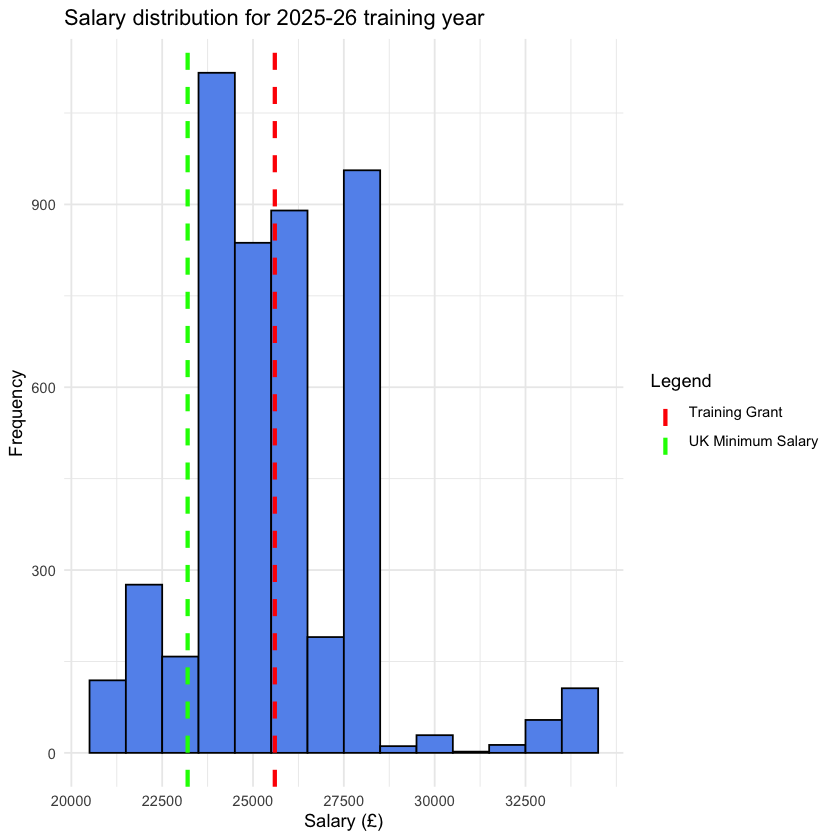

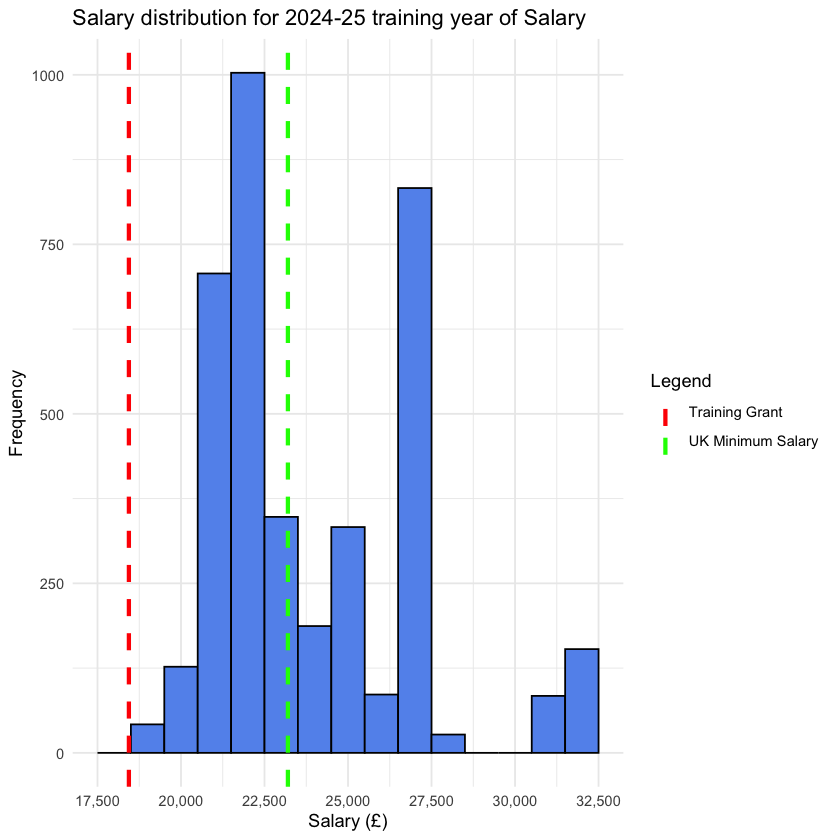

In [7]:
# Salary plots
# Expand the data to show the number of available slots

OD2526_expanded <- OD2526_modified %>%
    uncount(AvailableSlots) 

vlines_data_for_2526 <- data.frame(
  intercepts = c(25600, UK_minimum_salary),
  labels = c("Training Grant", "UK Minimum Salary"),
  colors = c("red", "green")
)

vlines_data_for_2425 <- data.frame(
  intercepts = c(18440, UK_minimum_salary),
  labels = c("Training Grant", "UK Minimum Salary"),
  colors = c("red", "green")
)

OD2526_salary_plot_expanded <- ggplot(OD2526_expanded, aes(x = Salary)) + 
  geom_histogram(binwidth = 1000, colour = 'black',fill = 'cornflowerblue') + 
  ggtitle("Salary distribution for 2025-26 training year") + 
  xlab("Salary (£)") + 
  ylab("Frequency") +
  scale_x_continuous(breaks = seq(0, max(OD2526_modified$Salary, na.rm = TRUE), by = 2500)) +
  geom_vline(data = vlines_data_for_2526, aes(xintercept = intercepts, color = labels),linetype="dashed", size = 1.2) +
  scale_color_manual(name = "Legend", values = c("Training Grant" = "red", "UK Minimum Salary" = "green")) +
  theme_minimal()


OD2526_salary_plot_expanded

OD2425_expanded <- OD2425_modified %>%
    uncount(AvailableSlots)

OD2425_salary_plot_expanded <- ggplot(OD2425_expanded, aes(x = Salary)) + 
  geom_histogram(binwidth = 1000, colour = 'black', fill = 'cornflowerblue') + 
  ggtitle("Salary distribution for 2024-25 training year of Salary") + 
  xlab("Salary (£)") + 
  ylab("Frequency") +
  scale_x_continuous(
    breaks = seq(0, max(OD2526_modified$Salary, na.rm = TRUE), by = 2500), 
    labels = scales::comma  # Use comma format for large numbers
  ) +
  geom_vline(data = vlines_data_for_2425, aes(xintercept = intercepts, color = labels), size = 1.2,linetype="dashed") +
  scale_color_manual(name = "Legend", values = c("Training Grant" = "red", "UK Minimum Salary" = "green")) +
  theme_minimal() 

OD2425_salary_plot_expanded

# Working hour plot
# Salary and visa plot

[1] "Number of placements with skilled worker visa availability in 2025-26: 1194"

[1] "Number of placements with skilled worker visa availability in 2024-25: 1502"

[1] "Number of placements with skilled worker visa availability in 2023-24: 1284"

[1] "Number of placements with skilled worker visa availability in 2022-23: 1146"

[1] "Average number of applicants needing visa: 287"

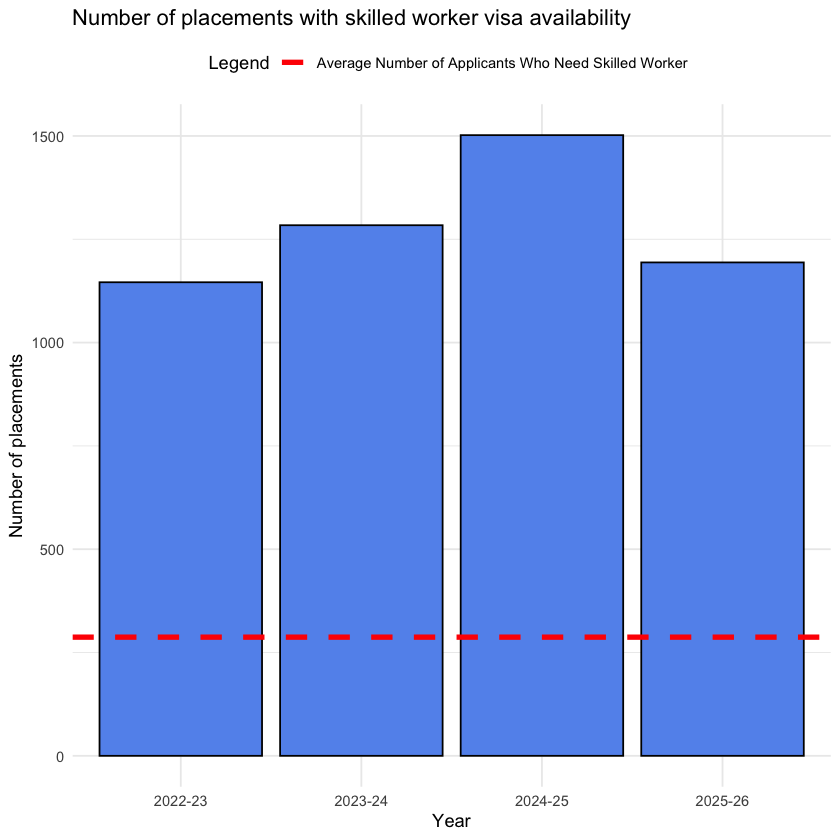

In [8]:
visa_availability_2526 <- OD2526_expanded %>%
  count(SkilledWorkerVisa) %>%
  filter(SkilledWorkerVisa == "Y") %>%
  pull(n)

visa_availability_2425 <- OD2425_expanded %>%
    count(SkilledWorkerVisa) %>%
    filter(SkilledWorkerVisa == "Y") %>%
    pull(n)

visa_availabilty_2324 <- OD2324 %>%
    uncount(Places.Available) %>%
    count(Skilled.worker.visa) %>%
    filter(Skilled.worker.visa == "Yes") %>%
    pull(n)

visa_availablilty_2223 <- OD2223 %>%
    uncount(Places.Available) %>%
    count(Skilled.worker.visa) %>%
    filter(Skilled.worker.visa == "Yes") %>%
    pull(n)

paste0("Number of placements with skilled worker visa availability in 2025-26: ", visa_availability_2526)
paste0("Number of placements with skilled worker visa availability in 2024-25: ", visa_availability_2425)
paste0("Number of placements with skilled worker visa availability in 2023-24: ", visa_availabilty_2324)
paste0("Number of placements with skilled worker visa availability in 2022-23: ", visa_availablilty_2223)

years <- c("2022-23", "2023-24", "2024-25", "2025-26")
visa_availability <- c(visa_availablilty_2223, visa_availabilty_2324, visa_availability_2425, visa_availability_2526)
# Below numbers taken fron oriel reports NHS HEE
visa_needed_in_2018_2019 <- 297
visa_needed_in_2019_2020 <- 281
visa_needed_in_2020_2021 <- 276
visa_needed_in_2021_2022 <- 315
visa_needed_in_2022_2023 <- 284
visa_needed_in_2023_2024 <- 270
average_visa_needed <- mean(c(visa_needed_in_2018_2019, visa_needed_in_2019_2020, visa_needed_in_2020_2021, visa_needed_in_2021_2022, visa_needed_in_2022_2023, visa_needed_in_2023_2024))
paste0('Average number of applicants needing visa: ', round(average_visa_needed))


df.visa <- as.data.frame(cbind(years, visa_availability ))
df.visa$visa_availability <- as.numeric(df.visa$visa_availability)

ggplot(df.visa, aes(x=years, y=visa_availability)) +
  geom_col(fill = 'cornflowerblue', colour = 'black') +
  labs(title="Number of placements with skilled worker visa availability", x="Year", y="Number of placements") +
  geom_hline(aes(yintercept=average_visa_needed, color = "Average Number of Applicants Who Need Skilled Worker"), linetype="dashed", lwd = 1.5) +
  scale_color_manual(name = "Legend", values = c("Average Number of Applicants Who Need Skilled Worker" = "red")) +
  theme_minimal() +
  theme(legend.position = "top")


- Visa availability going down?
https://www.lasepharmacy.hee.nhs.uk/national-recruitment/evaluation/

In [25]:
# Is each programme offering over national minimum salary?
is_it_over_national_minimum_hourly_wage <- function(hourly_wage){
    UK_minimum_hourly_wage <= hourly_wage
    # returns TRUE if hourly wage of the programme is higher than the national minimum hourly wage

}

OD2526_expanded <- OD2526_expanded %>%
    mutate(hourly_wage = round(Salary/52/WeeklyHours,digits = 2)) %>%
    mutate(higher_than_minimum_hourly_wage = is_it_over_national_minimum_hourly_wage(hourly_wage))

sum(OD2526_expanded$higher_than_minimum_hourly_wage)
sum(!OD2526_expanded$higher_than_minimum_hourly_wage)

min_hourly_wage <- min(OD2526_expanded$hourly_wage)
min_hourly_wage

max_hourly_wage <- max(OD2526_expanded$hourly_wage)
max_hourly_wage  

17.49 * 37.5 * 52

[1] 4757

[1] 0

[1] 11.44

[1] 17.49

[1] 34105.5

In [10]:
colnames(OD2425_expanded)

[1] "Region"                 "SubRegion"              "Sector"                
 [4] "ProgramPreference"      "ProgramTitle"           "ProgramDescription"    
 [7] "EmployerType"           "EmployerName"           "OrgSizePrimaryCareOnly"
[10] "HospitalSpecialties"    "SkilledWorkerVisa"      "LicenseCount"          
[13] "Salary"                 "TrainingProvider"       "WeeklyHours"           
[16] "ICSName"                "PlacementCount"         "PlacementSetting1"     
[19] "PlacementSetting2"      "PlacementSetting3"      "PlacementSetting4"